# Examples with `rms`

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import astropy.units as u

We'll use these objects from `rms` to specify the star, the spots, and an instance of `STSP`:

In [2]:
from rms import STSP, Star, Planet, Spot

Define some properties about the star:

In [3]:
spot_contrast = 0.7 # 0 -> perfectly dark; 1 -> same as photosphere
rotation_period = 30 # days
inc_stellar = 90 # Tilt of stellar rotation axis away from observer

planet = Planet(per=100, inc=0, a=100, t0=0, u=[0.2, 0.1], 
                limb_dark='quadratic', rp=0.1, ecc=0, 
                w=90, lam=0, b=2, duration=0.1)

star=Star(planet=planet,
          rotation_period=rotation_period, 
          inc_stellar=inc_stellar, 
          spot_contrast=spot_contrast)

Make an array of times at which to evaluate the light curve

In [4]:
start_time = Time('2009-01-01 00:00')
end_time = start_time + rotation_period * u.day
duration = end_time - start_time
time_steps = 30*u.min

times = start_time + np.arange(0, duration.to(u.day).value, 
                               time_steps.to(u.day).value) * u.day

Define some starspots. You can use units of `u.deg` or `u.rad`

In [5]:
spots = [Spot(latitude=30*u.deg, longitude=30*u.deg, radius=0.1), 
         Spot(latitude=-20*u.deg, longitude=180*u.deg, radius=0.02)]

We use a context manager here for handling the STSP input/output files that need to be written and deleted. You should use this syntax each time that you call STSP. **If you put this in a loop, take the whole `with` block.**

In [13]:
with STSP(times, star, spots, keep_dir=True) as stsp:
    lc = stsp.generate_lightcurve(n_ld_rings=10)

Make a quick plot of the light curve.

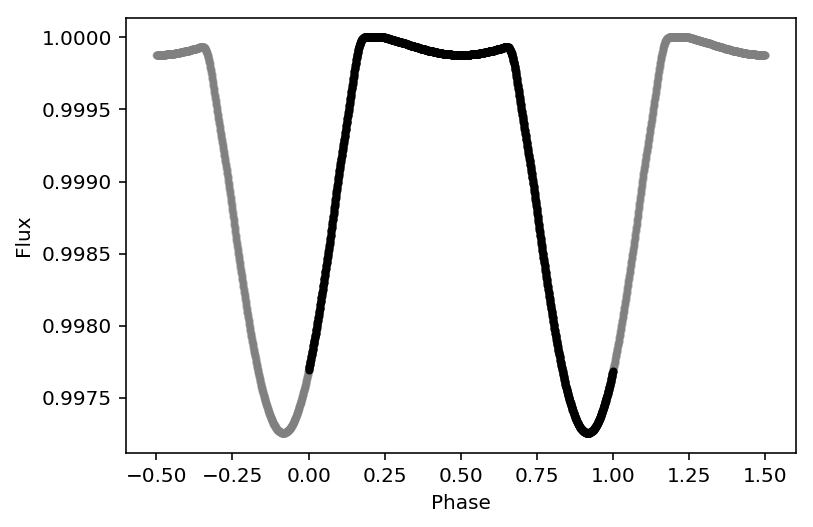

In [14]:
ax = lc.plot(star)

You can use access the attributes of the `LightCurve` object yourself like this:

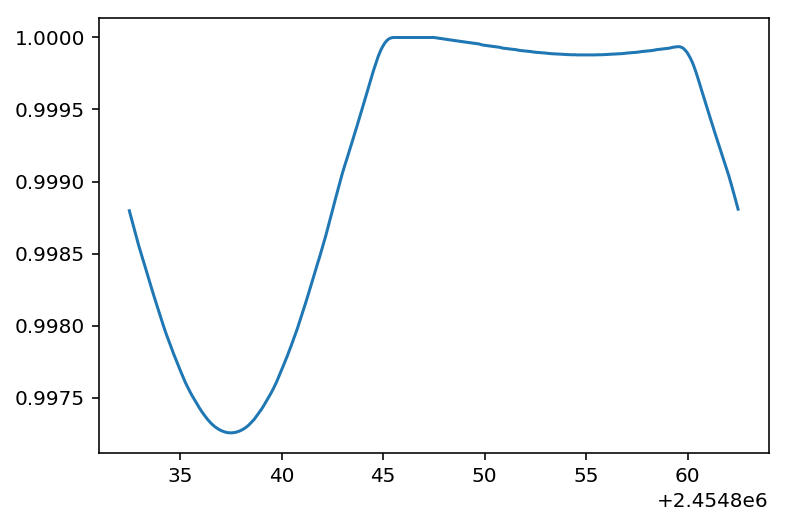

In [15]:
plt.plot(lc.times.jd, lc.fluxes)

You can see the a spot on a simple map like this: 

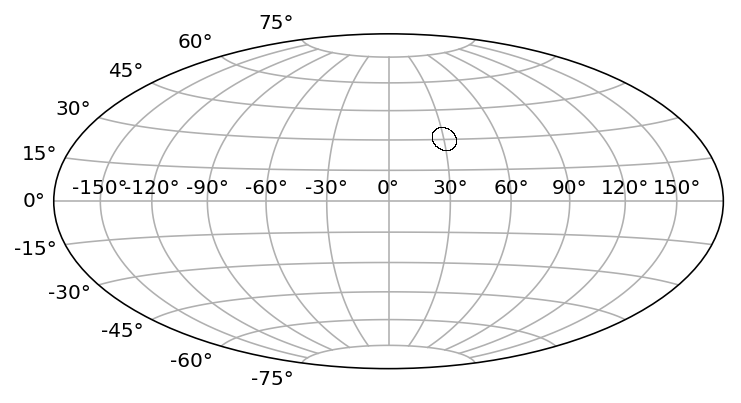

In [16]:
example_spot = spots[0]

example_spot.plot()

### Creating a random starspot distribution: 

In [17]:
n_spots = 30
random_radii = 0.1 * np.random.rand(n_spots)**3
spots = [Spot.at_random_position(radius=r) for r in random_radii]

with STSP(times, star, spots) as stsp: 
    lc = stsp.generate_lightcurve(n_ld_rings=5)


Spots tossed:

<Spot: lat=0.741080365072761 rad, lon=3.1402335380427453 rad, rad=0.06796156241284135>
<Spot: lat=0.47489719862096164 rad, lon=0.8797171463173287 rad, rad=0.06185014727721558> [rms.stsp]


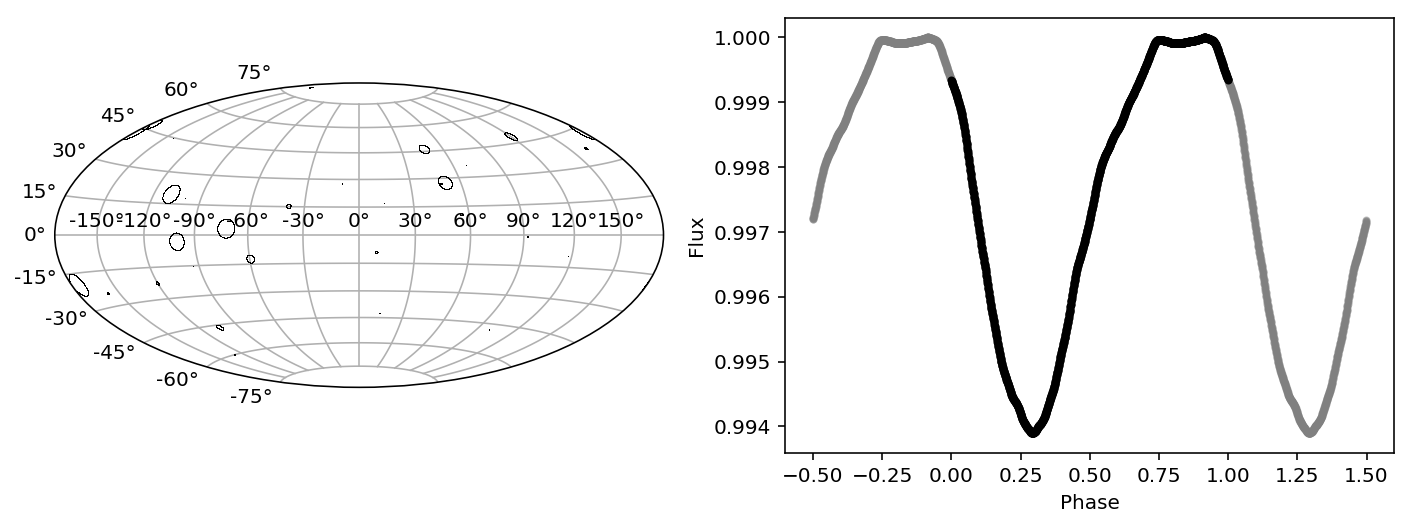

In [18]:
fig = plt.figure(figsize=(12, 4))
ax_star_map = fig.add_subplot(121, projection='hammer')
ax_lightcurve = fig.add_subplot(122)

for spot in spots:
    spot.plot(ax=ax_star_map)
ax_star_map.grid()

lc.plot(star, ax=ax_lightcurve)

### Draw randomly from the sunspot distribution near activity maximum:

In [19]:
n_spots = 15
spots = [Spot.from_sunspot_distribution() for i in range(n_spots)]

with STSP(times, star, spots) as stsp: 
    lc = stsp.generate_lightcurve(n_ld_rings=5)

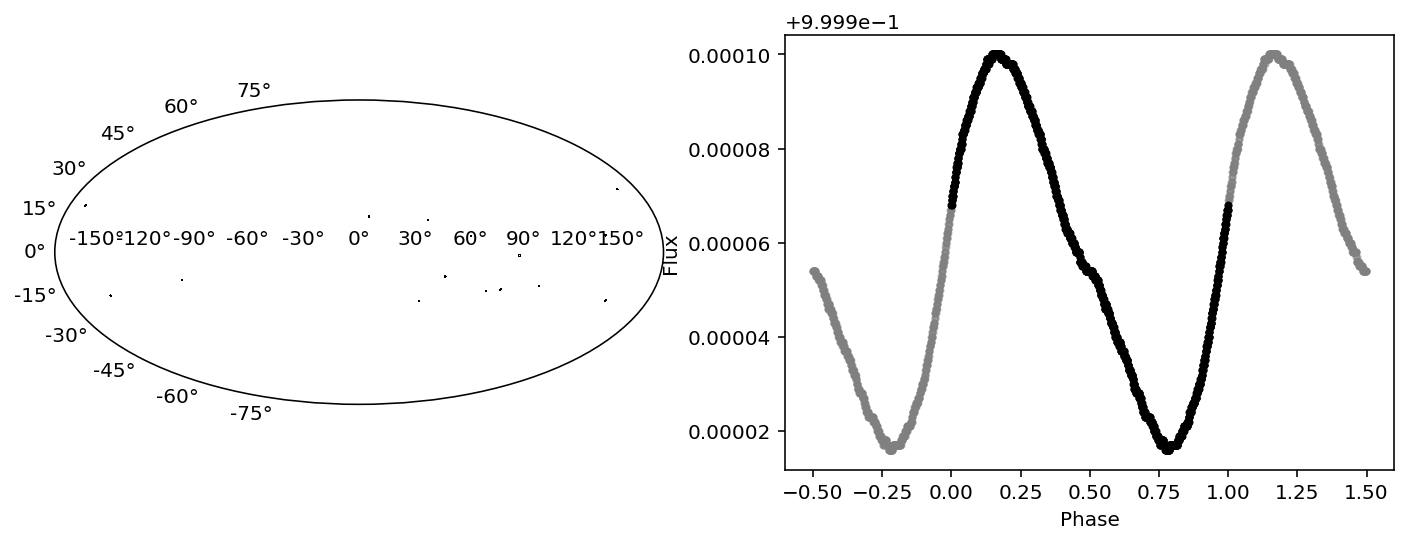

In [20]:
fig = plt.figure(figsize=(12, 4))
ax_star_map = fig.add_subplot(121, projection='hammer')
ax_lightcurve = fig.add_subplot(122)

for spot in spots:
    spot.plot(ax=ax_star_map)
ax_star_map.grid()

lc.plot(star, ax=ax_lightcurve)

In [63]:
t0 = 2454605.8914
rotation_period = 25

times = Time(t0, format='jd') + np.arange(-3/24, 3/24, 1/60/24) * u.day

planet = Planet(per=2, inc=89.5, a=5, t0=t0, rp=0.05, ecc=0, w=90, duration=0.1, lam=0)

sun_with_h11b = Star(planet=planet, rotation_period=25, inc_stellar=90, spot_contrast=0.2)

n_spots = 20
spots = [Spot.from_sunspot_distribution(mean_latitude=5) for i in range(n_spots)]


with STSP(times, sun_with_h11b, spots) as stsp: 
    lc = stsp.generate_lightcurve(n_ld_rings=10, normalize_oot=True)

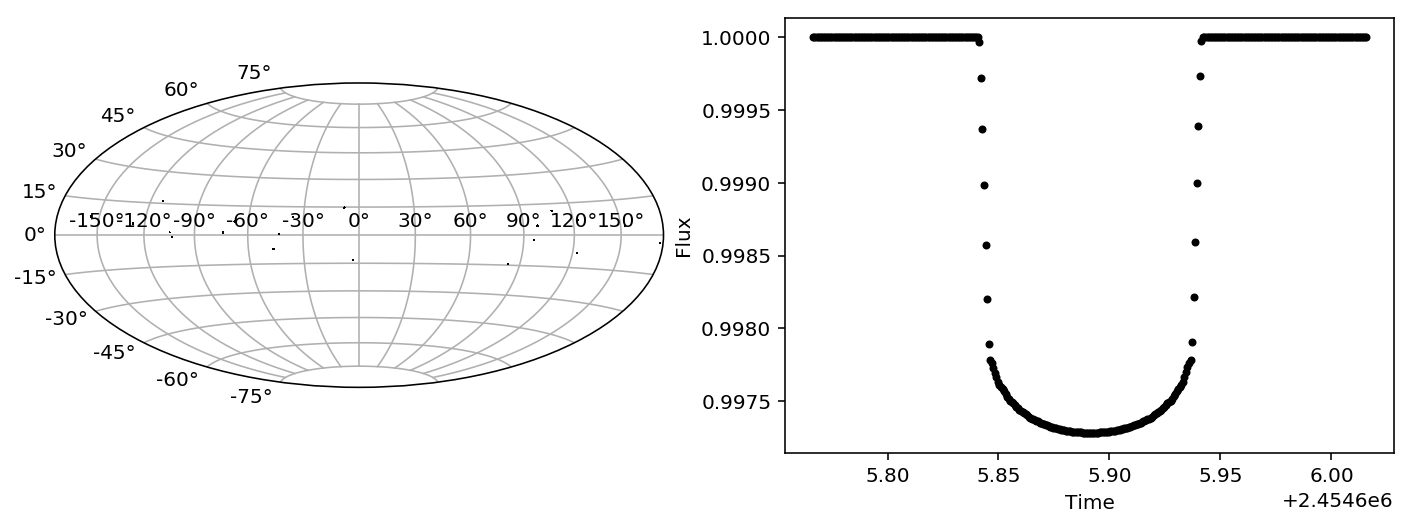

In [66]:
fig = plt.figure(figsize=(12, 4))
ax_star_map = fig.add_subplot(121, projection='hammer')
ax_lightcurve = fig.add_subplot(122)

for spot in spots:
    spot.plot(ax=ax_star_map)
ax_star_map.grid()

lc.plot(star, ax=ax_lightcurve, phase=False)